# Face detection 

_The face detection algorithms detects facial pattern through varios classifiers in an image to detect if there is a face in it_. In this tutorial, we shall see the following most popular algorithms on Face Detaction and apply them through python.
1. __Haarcascade Classifier__: This the most simple face ddetection algorithm for detecting Face and Eyes. This classifier along with detecting faces, can also detect other objects like a human body or cars. 
2. __Histogram of Oriented Gradient (HOG)__: HOG is more effiecient that Haarcascade. 
3. __Convolutional Neural Network (CNN)__: CNN is aguably the most robust algorithm for face and object detection.   

In the implementation, we shall use OpenCV for the Haarcascade classifier and Dlib library for HOG and CNN. Note that, we're not going to build the classifier in this Lab, rather we shall see how to leverage existinig classifiers for detecting objects. Building classifiers fall  under the discussion of Feature Training which will be covered during upcoming sections of this course.

# Task 1: HaarCascade Classifier 

## 1.1. Brief of Haarcasde classifier

* Every image is comprised by a grid of pixels. The shape of the grid in $m\times n$ called the resolution and the number of bits represent each pixel is called the bit-depth or color-depth. 
* In face detection it is a common practice to convert a color image into a grey-scale image; because, a greay scale image reduces the image size by 67% having preserved all the patterns for detection. 
* Steps
    1. The classifier is trained with two sets of objects one with faces and the other expect face. 
    2. The training samples then gets fed into AdaBoost training algorithm for computing the classifiers by the facial features.
    3. An passes through all the classifiers, if all the features are detected then Haarcaascade detects a face in it. The number of features passed determines the confifence value. If the confidence value does not exceed a cirtain theshold, the algorithm does not detect an face. 
    4. The classifier segments an image into multiple sub-areas and applies step 3 on each segment. When a Face is found at any segment the location of the segment is returned.




In [1]:
import cv2 as cv    #import the openCV library

__Step 1__: Load an image from local directory

In [3]:
image = cv.imread('images/people2.jpg')    # read the image 
# cv.imshow(winname='original', mat=image)   # show the image 
# cv.waitKey(0)

![](figs/fd_1.png)

First lets see the image resolution

In [4]:
height, width, depth = image.shape
print(f'Resolution is {height} X {width} with {depth} color channels')

Resolution is 600 X 800 with 3 color channels


__Step 2__: downscale the image for larger image 

In [51]:
scale_factor = 0.75     # set the scale factor 
if scale_factor == 1:
    image_scalled = image
else:
    image_scalled = cv.resize(image,                                                   # source image 
                            (int(width * scale_factor), int(height * scale_factor)),  # target resolution 
                            interpolation=cv.INTER_AREA)                              # interpolation used
cv.imshow(winname='Scalled', mat=image_scalled)   # show the image 
cv.waitKey(0)                     

-1

![](figs/fd2.png)

__Step 3:__  Convert the image into a Greayscale image

In [52]:
image_grey = cv.cvtColor(image_scalled,cv.COLOR_BGR2GRAY)      # converting into a grey scale
cv.imshow(winname='Greyscaled', mat=image_grey)   # show the image 
cv.waitKey(0)   

#print the image resolution   
height, width = image_grey.shape
print(f'Resolution is {height} X {width}')

Resolution is 450 X 600


![](figs/fd_3.png)

__Step 4:__ Creatinig a face detector and detect faces
The pretained classifiers can be found at : https://github.com/opencv/opencv/tree/master/data/haarcascades. The files are located locally in the `classifier/haarcascade` folder. 

In [53]:
## 4.1. Load the classifier 
face_detector = cv.CascadeClassifier(cv.data.haarcascades + "haarcascade_frontalface_default.xml")

In [55]:
# 4.2. Detect faces 
face_detected = face_detector.detectMultiScale(image_grey, 
                                              scaleFactor = 1.1, # scale according to the face size (>=1) 
                                              minNeighbors = 5,  # reduces False positives 
                                              minSize = (10,10)) # min size of a face to be detected
                                               
print(face_detected)   # returns a list of [x, y, width, height] of the detected area 

[[231 275 150 150]
 [158 174 119 119]
 [330  35 118 118]
 [ 41 150 151 151]
 [222  54 121 121]
 [349 257 180 180]]


__Step 5:__ Draw reactangle around the face 

In [23]:
temp = None
temp = image_scalled.copy()   # duplicate the image
for x,y,w,h in face_detected:
    # determine point1 and point2
    top_left = (x,y)
    bottom_right = (x+h, y+w)
    image_marked = cv.rectangle(temp, pt1=top_left, pt2=bottom_right, color=(0,255,0),thickness=2) #draw rect

cv.imshow('Face_detected', image_marked)
cv.waitKey(0)
cv.destroyAllWindows()

![](figs/fd_4.png)

# 1.2. Face Detection from a video & Live source 

In [6]:
import cv2 as cv
def face_detect(frame, scale, face_detector):
    '''
    Input : Frame 
    output: Frame with face detected 
    '''
    height, width, channel = frame.shape
    if scale == 1:
        frame_scalled = frame
    else:
        frame_scalled = cv.resize(frame,                                                   # source image 
                                (int(width * scale), int(height * scale)),  # target resolution 
                                interpolation=cv.INTER_AREA
                        )  
    frame_gr = cv.cvtColor(frame_scalled, cv.COLOR_BGR2GRAY)
    
    face_detected = face_detector.detectMultiScale(frame_gr)
    number_of_faces = len(face_detected)
    count = number_of_faces
    if count:
        for x,y,w,h in face_detected:
            cv.rectangle(img=frame_scalled,
                         pt1=(x,y), pt2=(x+h,y+h), 
                         color=(255,0,255),
                         thickness=2)
            cv.putText(img=frame_scalled,
                       text=f'Face {count}', 
                       org=(x,y),
                       fontFace=cv.FONT_HERSHEY_PLAIN, 
                       fontScale=1, 
                       color=(0,255), 
                       thickness=1)
            count-=1
    
    cv.putText(img=frame_scalled,
               text=f'Face Count = {number_of_faces}', 
               org=(50,50),
               fontFace=cv.FONT_HERSHEY_PLAIN,
               fontScale=2, 
               color=(0,255,255), 
               thickness=2)
    return frame_scalled

def read_video(src, scale):
    capture = cv.VideoCapture(src)
    face_detector = cv.CascadeClassifier(cv.data.haarcascades + "haarcascade_frontalface_default.xml")
    while True:
        isTrue, frame = capture.read()
        frame_org = frame.copy()
        frame_marked = face_detect(frame, scale, face_detector)
        cv.imshow(winname='Original', mat=frame_org)
        cv.imshow(winname='Face Detected', mat=frame_marked)
        if cv.waitKey(20) & 0xFF == ord('d'):        # stop the video is the key 'd' is pressed (you can change as per your choice)
            break
    capture.release()  
    cv.destroyAllWindows()

In [10]:
scale = 1
read_video(src=0, scale=scale)

![](figs/fd_5.png)

# Task 2: Face detection using HOG

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

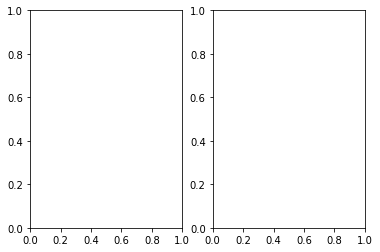

In [5]:
fig, ax = plt.subplots(nrows=1, ncols=2);   # create a plot for the images
plt.show()

__Step 1:__ Read the image

In [2]:
import dlib      # to install: pip install cmake wheel dlib 
import cv2 as cv # for reading images

image = cv.imread('images/people2.jpg')
image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)

# cv.imshow(winname='Original', mat=image)
# cv.waitKey(0)

![](figs/image_org.png)

__Step 2__: Create a classifier

In [3]:
face_detector = dlib.get_frontal_face_detector()    # create a fronal face detector object 

__STep 3__: Detect Faces

In [4]:
face_detected = face_detector(image)  # apply face detection on a given image
print('Face Positions')
print('------------------------------------')
for i  in range(len(face_detected)):
    print(f'\t face {i} \t = {face_detected[i]}')
print('------------------------------------')
print(f'Number of face dettected = {len(face_detected)}')

Face Positions
------------------------------------
	 face 0 	 = [(231, 259) (355, 383)]
	 face 1 	 = [(313, 393) (492, 572)]
	 face 2 	 = [(74, 214) (254, 393)]
	 face 3 	 = [(427, 62) (576, 211)]
	 face 4 	 = [(314, 107) (438, 231)]
	 face 5 	 = [(452, 337) (710, 595)]
------------------------------------
Number of face dettected = 6


__Step 4__: Mark Faces 

In [5]:
image_marked = image.copy()
for face in face_detected:
    top_left, bottom_right = (face.left(), face.top()),(face.right(), face.bottom())
    cv.rectangle(img=image_marked, pt1=top_left, pt2=bottom_right, color=(0,255,0), thickness=2) # mark faces
cv.imshow(winname='Marked', mat=image_marked)
cv.waitKey(0)

233

![](figs/image_marked.png)

## Task 2.2. Apply HOG on a live source

In [1]:
import dlib
import cv2 as cv

In [5]:
# HOG Based Face detection

def hog_detection(frame, classfier):
    hog_face_detector = classfier
    face_detected = hog_face_detector(frame)

    face_count = len(face_detected)

    ## face count
    cv.putText(img=frame,
               text=f'Face Count = {face_count}',
               color=(0,255,255),
               org=(50,50),fontFace=cv.FONT_HERSHEY_PLAIN,
               thickness=2, 
               fontScale=2
               )

    for face in face_detected:
        t,b,l,r=  face.top(), face.bottom(), face.left(), face.right()
        
        #mark face
        cv.rectangle(img=frame, 
                     pt1=(l,t), pt2=(r,b), 
                     color=(0,255,0), thickness=2) 
        ## Face label 
        cv.putText(img=frame,
                    text=f'Face {face_count}',
                    color=(255,0,255),
                    org=(l,t-10),fontFace=cv.FONT_HERSHEY_PLAIN, 
                    thickness=2,
                    fontScale=1
                    )
        face_count -= 1
    return frame

In [6]:
def read_video(src, scale):
    capture = cv.VideoCapture(src)
    face_detector = dlib.get_frontal_face_detector()
    while True:
        isTrue, frame = capture.read()
        frame_org = frame.copy()
        frame_marked = hog_detection(frame, face_detector)
        cv.imshow(winname='Original', mat=frame_org)
        cv.imshow(winname='Face Detected', mat=frame_marked)
        if cv.waitKey(20) & 0xFF == ord('d'):        # stop the video is the key 'd' is pressed (you can change as per your choice)
            break
    capture.release()  
    cv.destroyAllWindows()

In [7]:
src=0
scale=1
read_video(src,scale)

![](figs/hog_face_detected.png)

# Task3: Facial point detection 

You will need the dataset from here: https://pyimagesearch.com/2017/04/03/facial-landmarks-dlib-opencv-python/

In [8]:
import dlib
import cv2 as cv

In [9]:
image = cv.imread('images/people2.jpg')             # step1: Read image 

face_detector = dlib.get_frontal_face_detector()    # step2: create face detector objecct
face_detected = face_detector(image)                # step3: detect faces 

point_detector = dlib.shape_predictor('Classifiers/68_FPLM/shape_predictor_68_face_landmarks.dat') # step4: load the 68 Facial point lnadmark dataset

# step5: mark faces
image_marked = image.copy()       # create a temp. replica  
face_count = len(face_detected)
for face in face_detected:
    t,b,l,r = face.top(), face.bottom(), face.left(), face.right()
    cv.rectangle(img=image_marked, 
                     pt1=(l,t), pt2=(r,b), 
                     color=(0,255,0), thickness=2) 

    # step6: mark landmark
    points = point_detector(image, face)       # 68 points for each face
    for point in points.parts():
        cv.circle(img=image_marked, 
                  center=(point.x, point.y), radius=2, 
                  color=(0,0,255), thickness=-1
         )  # plot each point 



cv.imshow(winname='original', mat=image)
cv.imshow(winname='Marked', mat=image_marked)
cv.waitKey(0)

233

![](figs/fpoint.png)

## Task 3.2: Apply 68 Facial landmarks on live feed 

In [2]:
import dlib
import cv2 as cv

In [3]:

# HOG Based Face detection + 68 facial point detection

def landmark_detection(frame, hog_model, fp_model):
    '''
    hog_model : hog classifier object
    fp_model : 68 facial point predictor object 
    '''
    hog_face_detector = hog_model
    point_predictor = fp_model

    face_detected = hog_face_detector(frame)

    face_count = len(face_detected)

    ## face count
    cv.putText(img=frame,
               text=f'Face Count = {face_count}',
               color=(0,255,255),
               org=(50,50),fontFace=cv.FONT_HERSHEY_PLAIN,
               thickness=2, 
               fontScale=2
               )

    for face in face_detected:
        t,b,l,r=  face.top(), face.bottom(), face.left(), face.right()
        points = fp_model(frame, face)
        
        #mark face
        cv.rectangle(img=frame, 
                     pt1=(l,t), pt2=(r,b), 
                     color=(0,255,0), thickness=2) 
        ## Face label 
        cv.putText(img=frame,
                    text=f'Face {face_count}',
                    color=(255,0,255),
                    org=(l,t-10),fontFace=cv.FONT_HERSHEY_PLAIN, 
                    thickness=2,
                    fontScale=1
                    )
        face_count-=1

        ## plot points
        for point in points.parts():
            cv.circle(img=frame, 
                      center=(point.x, point.y), radius=2, 
                      color=(0,0,255), thickness=-1)
    return frame

In [4]:
def read_video(src, scale):
    print('Initializing Camera...')
    capture = cv.VideoCapture(src)  
    
    print('Loading HOG Face detection model...')
    face_detector = dlib.get_frontal_face_detector()     # create hog object 
    
    print('Loading 68 Facial Landmark model...')
    point_predictor = dlib.shape_predictor('Classifiers/68_FPLM/shape_predictor_68_face_landmarks.dat') # create fp object 
    
    print('Rendering...')
    while True:
        isTrue, frame = capture.read()
        frame_org = frame.copy()
        frame_marked = landmark_detection(frame, hog_model=face_detector, fp_model=point_predictor)
        cv.imshow(winname='Original', mat=frame_org)
        cv.imshow(winname='Face Detected', mat=frame_marked)
        if cv.waitKey(20) & 0xFF == ord('d'):        # stop the video is the key 'd' is pressed (you can change as per your choice)
            break
    capture.release()  
    cv.destroyAllWindows()

In [5]:
src=0                 #select source 
scale=1               #select scale
read_video(src,scale) # run

Initializing Camera...
Loading HOG Face detection model...
Loading 68 Facial Landmark model...
Rendering...


![](figs/face_points.png)